In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sql.connect('database.sqlite')
conn

In [3]:
pd.read_sql_query("select * from Salaries" , conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [4]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

### 1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided','Not provided')

In [6]:
q = '''select JobTitle, avg(TotalPayBenefits) as AverageofTotalPayBenefits from Salaries
    where JobTitle != 'Not provided'
    or
    JobTitle != 'Not Provided'
    group by JobTitle
    order by 2 desc
    limit 10
'''
sql_query(q)

,JobTitle,AverageofTotalPayBenefits
0,Chief Investment Officer,436224.360000
1,Chief of Police,411732.266667
2,"Chief, Fire Department",408865.326667
3,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
4,"Gen Mgr, Public Trnsp Dept",380696.440000
5,"Dep Dir for Investments, Ret",355731.260000
6,Mayor,354212.906667
7,"Adm, SFGH Medical Center",347079.706667
8,Controller,343061.140000
9,Asst Chf of Dept (Fire Dept),342597.550556


In [7]:
q = '''select JobTitle, avg(TotalPayBenefits) as AverageofTotalPayBenefits from Salaries
    where JobTitle != 'Not provided'
    or
    JobTitle != 'Not Provided'
    group by JobTitle
    order by 2 desc
'''
sql_query(q)

,JobTitle,AverageofTotalPayBenefits
0,Chief Investment Officer,436224.360000
1,Chief of Police,411732.266667
2,"Chief, Fire Department",408865.326667
3,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
4,"Gen Mgr, Public Trnsp Dept",380696.440000
...,...,...
2154,"BOARD/COMMISSION MEMBER, GROUP III",638.787879
2155,"BdComm Mbr, Grp2,M=$25/Mtg",475.047742
2156,"BOARD/COMMISSION MEMBER, GROUP II",296.511628
2157,PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,149.510000


### 2. Which JobTitle has the most employees in each year? exclude('Not Provied','Not provided')

In [9]:
q = '''select count(EmployeeName), JobTitle, Year from Salaries
    where JobTitle != 'Not provided'
    or
    JobTitle != 'Not Provided'
    group by Year
    '''

sql_query(q)

,count(EmployeeName),JobTitle,Year
0,36159,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011
1,36766,"Lieutenant, Fire Suppression",2012
2,37606,Chief of Police,2013
3,38123,Deputy Chief 3,2014


### 3. What is the total number of unique employees? exclude('Not Provided','Not provided')

In [11]:
q = '''select count(DISTINCT Id) from salaries
    where Employeename NOT IN ('Not Provided', 'Not provided')
    '''
sql_query(q)

,count(DISTINCT Id)
0,148648


### 4. Show all Employees ordered by their TotalPayBenefits in descending order? exclude('Not Provided','Not provided')

In [13]:
q = '''select * from salaries
    where TotalPayBenefits Not in('Not Provided','Not provided')
    order by TotalPayBenefits desc
    '''
sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,110532,David Shinn,Deputy Chief 3,129150.01,0,342802.63,38780.04,471952.64,510732.68,2014,,San Francisco,PT
3,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,,San Francisco,FT
4,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.66,339653.70,436224.36,2014,,San Francisco,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,110529,Timothy E Gibson,Police Officer 3,,0,0,-2.73,0.00,-2.73,2013,,San Francisco,
148651,110530,Mark E Laherty,Police Officer 3,,0,0,-8.2,0.00,-8.20,2013,,San Francisco,
148652,110531,David P Kucia,Police Officer 3,,0,0,-33.89,0.00,-33.89,2013,,San Francisco,


### 5. Show all Employees with a TotalPayBenefits value between 125000 and 150000 and a JobTitle 'Firefighter'? exclude('Not Provided','Not provided')

In [15]:
q = '''select EmployeeName, JobTitle, TotalPayBenefits from Salaries
    where TotalPayBenefits between 125000 and 150000
    and JobTitle = 'Firefighter'
    and TotalPayBenefits Not in('Not Provided','Not provided') 
    '''

sql_query(q)

,EmployeeName,JobTitle,TotalPayBenefits
0,Randall Henderson,Firefighter,147912.75
1,Virginia Cheung,Firefighter,147862.14
2,Travis Hemenez,Firefighter,147664.12
3,Gail Readdie,Firefighter,147452.17
4,Gregory Ginotti,Firefighter,147216.47
...,...,...,...
110,Stephen J Kloster,Firefighter,126784.13
111,Jeffrey D Ryan,Firefighter,126687.13
112,Jovan R Blake,Firefighter,126169.62
113,Dino M Cafferata,Firefighter,125680.52


### 6. How many employees have no overtime pay or other pay? exclude('Not Provided','Not provided')

In [17]:
q = '''select count(EmployeeName), OvertimePay, OtherPay from Salaries
    where OvertimePay is Null
    and OtherPay is Null
    and OvertimePay NOT IN ('Not Provided', 'Not provided')
    and OtherPay NOT IN ('Not Provided', 'Not provided')
    '''

sql_query(q)

,count(EmployeeName),OvertimePay,OtherPay
0,0,None,None


### 7. Show top 10 employees having (overtime pay + otherpay) in bar plot? exclude('Not Provided','Not provided')

In [19]:
q = '''select EmployeeName, (OvertimePay + OtherPay) as TotalPay from Salaries
    where OvertimePay NOT IN ('Not Provided', 'Not provided')
    and OtherPay NOT IN ('Not Provided', 'Not provided')
    order by TotalPay Desc
    limit 10
    '''

sql_query(q)

,EmployeeName,TotalPay
0,NATHANIEL FORD,400184.25
1,GARY JIMENEZ,382943.26
2,David Shinn,342802.63
3,CHRISTOPHER CHONG,254427.61
4,John Goldberg,245999.41
5,Gary Altenberg,234035.79
6,Khoa Trinh,224472.73
7,ALSON LEE,223489.04
8,Brendan A Ward,216637.92
9,Whitney P Yee,213311.84


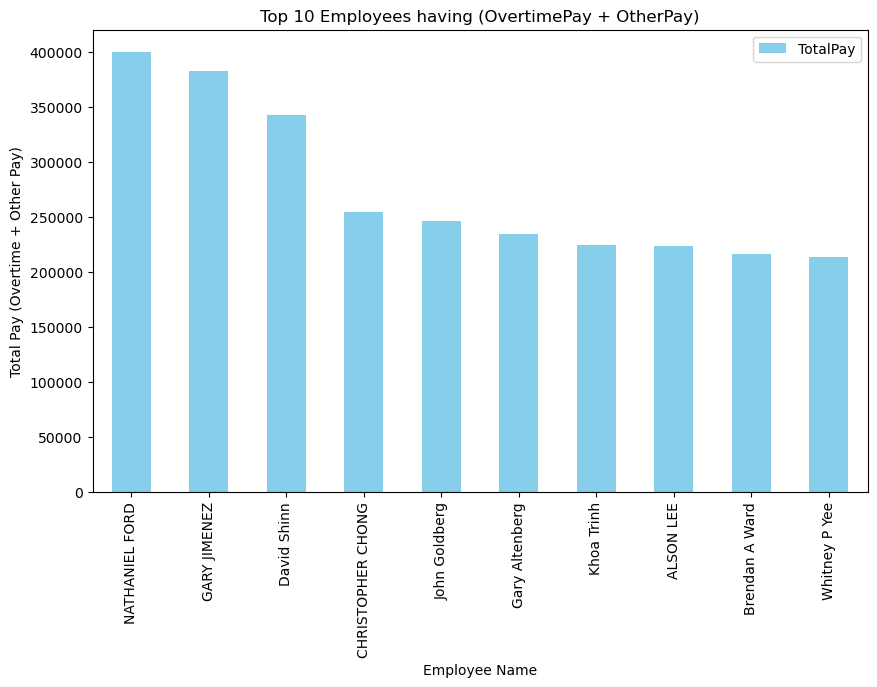

In [20]:
a = pd.read_sql_query(q,conn)
a.plot(kind='bar', x='EmployeeName', y='TotalPay', color='skyblue', figsize=(10,6))
plt.xlabel('Employee Name')
plt.ylabel('Total Pay (Overtime + Other Pay)')
plt.title('Top 10 Employees having (OvertimePay + OtherPay)')
plt.show()

### 8. Show The Average of Basepay, OvertimePay, OtherPay for all employees in pie chart? exclude('Not Provided','Not provided')

In [22]:
q = '''select avg(BasePay) AverageBasePay, avg(OvertimePay) as AverageOvertimePay, avg(OtherPay) as AverageOtherPay from salaries
    where BasePay NOT IN ('Not Provided', 'Not provided')
    and OvertimePay NOT IN ('Not Provided', 'Not provided')
  and OtherPay NOT IN ('Not Provided', 'Not provided')
  '''
sql_query(q)

,AverageBasePay,AverageOvertimePay,AverageOtherPay
0,66055.506718,5066.059886,3648.767297


### 9. Get the average total vbenefits of eqach job title  but with only for those with average pay greater than 75000?xclude('Not Provided','Not provided')

In [37]:
q = '''SELECT JobTitle, AVG(TotalPayBenefits) AS AverageTotalBenefits FROM salaries
    WHERE TotalPayBenefits NOT IN ('Not Provided', 'Not provided')
    GROUP BY JobTitle
    HAVING AVG(TotalPayBenefits) > 75000
    '''

sql_query(q)

,JobTitle,AverageTotalBenefits
0,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
1,ADMINISTRATIVE ANALYST III,92698.515000
2,ADMINISTRATIVE ENGINEER,127961.430000
3,ADMINISTRATIVE SERVICES MANAGER,77015.580000
4,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.440000
...,...,...
1432,Window Cleaner Supervisor,108550.543333
1433,Wire Rope Cable Maint Mechanic,138837.434333
1434,Wire Rope Cable Maint Sprv,242118.323333
1435,Worker's Comp Supervisor 1,96125.531429


### 10. Get the number of employees (employee name) for each job title, where the count is greater than 10? exclude('Not Provided','Not provided')

In [44]:
q = '''SELECT JobTitle, COUNT(EmployeeName) AS EmployeeCount from salaries
    where EmployeeName NOT IN ('Not Provided', 'Not provided')
    GROUP BY JobTitle
    HAVING COUNT(EmployeeName) > 10
    '''
sql_query(q)

,JobTitle,EmployeeCount
0,ACCOUNT CLERK,83
1,ACCOUNTANT INTERN,48
2,ADMINISTRATIVE ANALYST,93
3,AIRPORT COMMUNICATIONS OPERATOR,27
4,AIRPORT ECONOMIC PLANNER,13
...,...,...
1151,Wire Rope Cable Maint Mechanic,30
1152,Worker's Comp Supervisor 1,14
1153,Worker's Compensation Adjuster,74
1154,X-RAY LABORATORY AIDE,26
